In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Load the CSV containing image file names and ONSD measurements
df_measurements = pd.read_csv('./documents/processed_images/image_measurements.csv')

# Load and preprocess images
def load_and_preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.resize((128, 128))  # Ensure all images are the same size
        return np.array(img).flatten()  # Flatten the image data

base_dir = './documents/processed_images'
image_data = np.array([load_and_preprocess_image(os.path.join(base_dir, filename)) for filename in df_measurements['image_filename']])
onsd_measurements = df_measurements['onsd_measurement'].values


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, onsd_measurements, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluating the model
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")


Linear Regression MSE: 0.33026089097865086


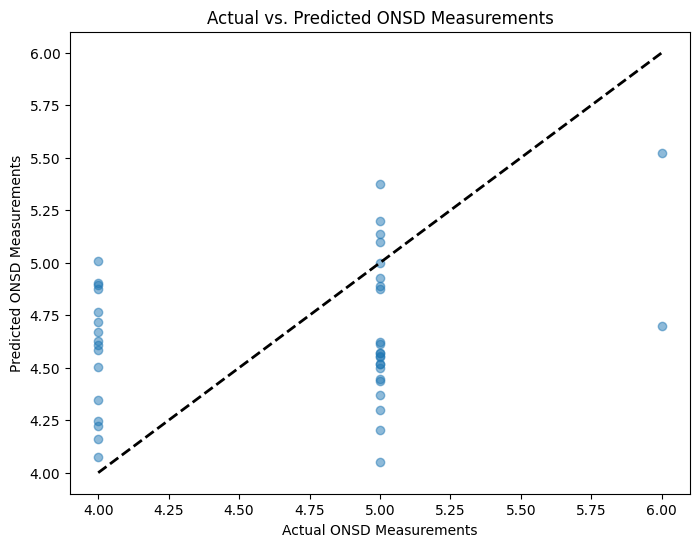

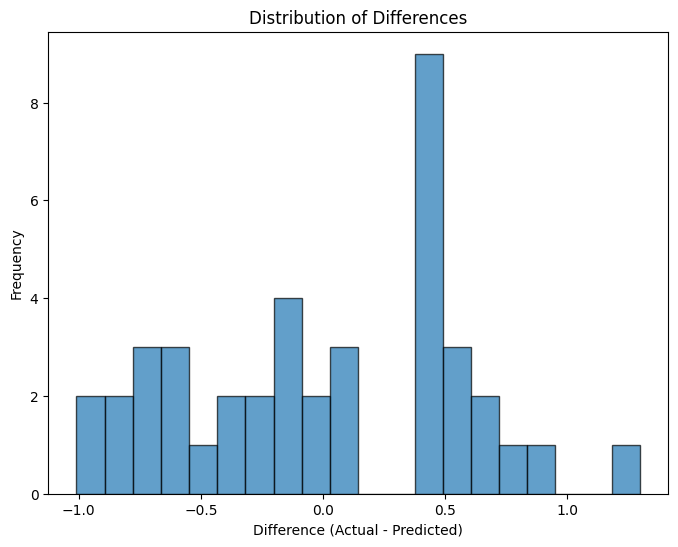

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # A diagonal line for reference
plt.xlabel('Actual ONSD Measurements')
plt.ylabel('Predicted ONSD Measurements')
plt.title('Actual vs. Predicted ONSD Measurements')
plt.show()

# Calculate the differences between the actual and predicted values
differences = y_test - lr_predictions

# Plotting the distribution of differences
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Differences')
plt.show()


In [5]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluating the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


In [ ]:
# Scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line
plt.xlabel('Actual ONSD Measurements')
plt.ylabel('Predicted ONSD Measurements')
plt.title('Random Forest: Actual vs. Predicted ONSD Measurements')
plt.show()


In [ ]:
# Calculate the differences (residuals) between the actual and predicted values
rf_differences = y_test - rf_predictions

# Plotting the distribution of differences for Random Forest
plt.figure(figsize=(8, 6))
plt.hist(rf_differences, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Random Forest: Distribution of Differences')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"Random Forest Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
